<font size = 6, color = "cyan"><b> Independent Project I </b></font>

<font size = 5, color = "pink"><b> HR Analytics: Employee Attrition </b></font>

<em><u>This project comprises two parts:</em></u>

_1. Dashboard Visualization using Microsoft Power BI_

_2. Statistical Insights & Predictions Using Machine Learning_

<font size = 4, color = "gold"><b> About the Dataset </b></font>
* The dataset titled [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data) was obtained through Kaggle
* It's a fictional dataset containing <u>1470 records and 35 attributes</u> (e.g., job satisfaction, job role, education, performance rating, years with current manager, etc.) with the <u>class being Attrition</u> (Yes/No Binary Variable)

<font size = 4, color = "gold"><b> Data Cleaning </b></font>
* All data cleaning was done using Microsoft Excel

<u>Steps:</u>

1. Spell Checking --> no spelling errors
2. Checking for Blanks --> no blanks
3. Checking for Duplicate Rows --> no duplicate rows
4. Dealing With Inconsistencies (trimming whitespaces)

Not much data cleaning had to be done, which is kind of expected given that this was synthetic data prepared for research purposes :)

_I should find myself a real dataset to do some data cleaning_

<font size = 4, color = "gold"><b> Data Preprocessing </b></font>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
dataset_file_path = r'C:\Users\user\OneDrive\Desktop\Post-Grad Stuff\Analytics Practice\Datasets (Original Format)\hr_employee_attrition_dataset.csv'

# normally, I would just pass the filepath so we can read the dataset into the dataframe
# however, I ran df.info() later and identified 9 categorical variables, so I decided to pass a dtype parameter, assigning them to the dtype 'category' 
# which is a memory-efficient way to store and handle categorical data by assigning each value a unique integer ID to each category
# (note that I checked that all 9 are nominal data)

# you would still need to encode these attributes if you're using models like Linear Regression, Logistic Regression, SVM, KNN, or Neural Networks
# (require numerical input and do not handle 'category' automatically)
# however, if using tree-based models like XGBoost or Random Forest, no need to encode later (they handle category dtype automatically).

dtype_options = {
    'Attrition': 'category', 
    'BusinessTravel': 'category',
    'Department':'category',
    'EducationField':'category',
    'Gender':'category',
    'JobRole':'category',
    'MaritalStatus': 'category',
    'Over18':'category',
    'OverTime':'category'
}

df = pd.read_csv(filepath_or_buffer = dataset_file_path, dtype = dtype_options)

In [ ]:
display(df)                     # displays dataset
df.info()                       # provides insights on non-null count, dtype of each column
df.nunique()                    # shows number of unique values for each column
df.describe().drop('count')     # data summary (count, mean, standard deviation, min, max, and percentiles for each numerical column)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [96]:
df.nunique()                        # by running this, we identify three columns with only 1 unique value, which means for all records
                                    # this attribute is the same --> will not benefit us in the study so remove
                                    # these columns are EmployeeCount, Over18, StandardHours
                                    # we can also remove EmployeeNumber, as it's a unique identifier for each employee and does not contribute to the model
                                    # other unnecessary attributes we can remove are Education (#s don't really show us anything), DailyRate, HourlyRate

updated_df = df.drop(columns = ['DailyRate', 'Education', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'Over18', 'StandardHours'])

In [97]:
updated_df.select_dtypes(include = ['category']).nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [99]:
# note the following binary attributes (Gender, OverTime) in addition to, of course, our class 'attrition'
# it wouldn't make sense to one-hot encode attrition as we're trying to predict it
# we can use label/ordinal encoding instead (as well as for our binary variables)
# we will also include BusinessTravel as the order matters (NonTravel, Rarely, Frequently)

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

# travel_order = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
# ordinal_encoder = OrdinalEncoder(categories = [travel_order], handle_unknown = 'use_encoded_value', unknown_value = -1)

updated_df['Attrition'] = label_encoder.fit_transform(updated_df['Attrition'])                        # Yes = 1, No = 0
updated_df['BusinessTravel'] = ordinal_encoder.fit_transform(updated_df[['BusinessTravel']])          # Travel_Rarely = 2, Travel_Frequently = 1, Non-Travel = 0
                                                                                                      # unfortunately going alphabetically (tried fixing it but didn't)
updated_df['Gender'] = label_encoder.fit_transform(updated_df['Gender'])                              # Male = 1, Female = 0
updated_df['OverTime'] = label_encoder.fit_transform(updated_df['OverTime'])                          # Yes = 1, No = 0

In [100]:
# apply One Hot Encoding (dummy vars) for the remaining nominal attributes
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output = False) 
# OneHotEncoder returns a sparse matrix by default, which can cause issues when passing it to pd.DataFrame(), hence, convert to a dense array

nominal_cols = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
one_hot_encoded = encoder.fit_transform(updated_df[nominal_cols])

# now convert to dataframe and join with the original dataframe (while also removing the original cols since now you have the encoded ones)
one_hot_encoded_df = pd.DataFrame(data = one_hot_encoded, columns = encoder.get_feature_names_out(nominal_cols))
encoded_df = pd.concat(objs = [updated_df.drop(nominal_cols, axis = 1), one_hot_encoded_df], axis = 1)

display(encoded_df)         # we now have 45 columns

,Age,Attrition,BusinessTravel,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2.0,1,2,0,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,1.0,8,3,1,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,2.0,2,4,1,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1.0,3,4,0,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,2.0,2,1,1,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1.0,23,3,1,4,2,4,2571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,2.0,6,4,1,2,3,1,9991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,2.0,4,2,1,4,2,2,6142,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1.0,2,4,1,2,2,2,5390,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<font size = 4, color = "gold"><b> II. Statistical Insights & Predictions Using Machine Learning </b></font>

<font size = 4, color = "green"><b> Statistical Insights </b></font>

In [101]:
# define the target (y) and X (attributes)
y = encoded_df['Attrition']
X = encoded_df.drop(columns = ['Attrition'])

In [102]:
# class distribution --> we can see it's unbalanced (More No than Yes, which makes sense)
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

<font size = 4, color = "green"><em>It's important we watch out for multicollinearity (as well as weakly-correlated attributes); <u>Why?</u></em></font>

    Some predictors give redundant information

    The model coefficients may be unreliable

    This makes it difficult to determine the unique influence of each predictor on the dependent variable

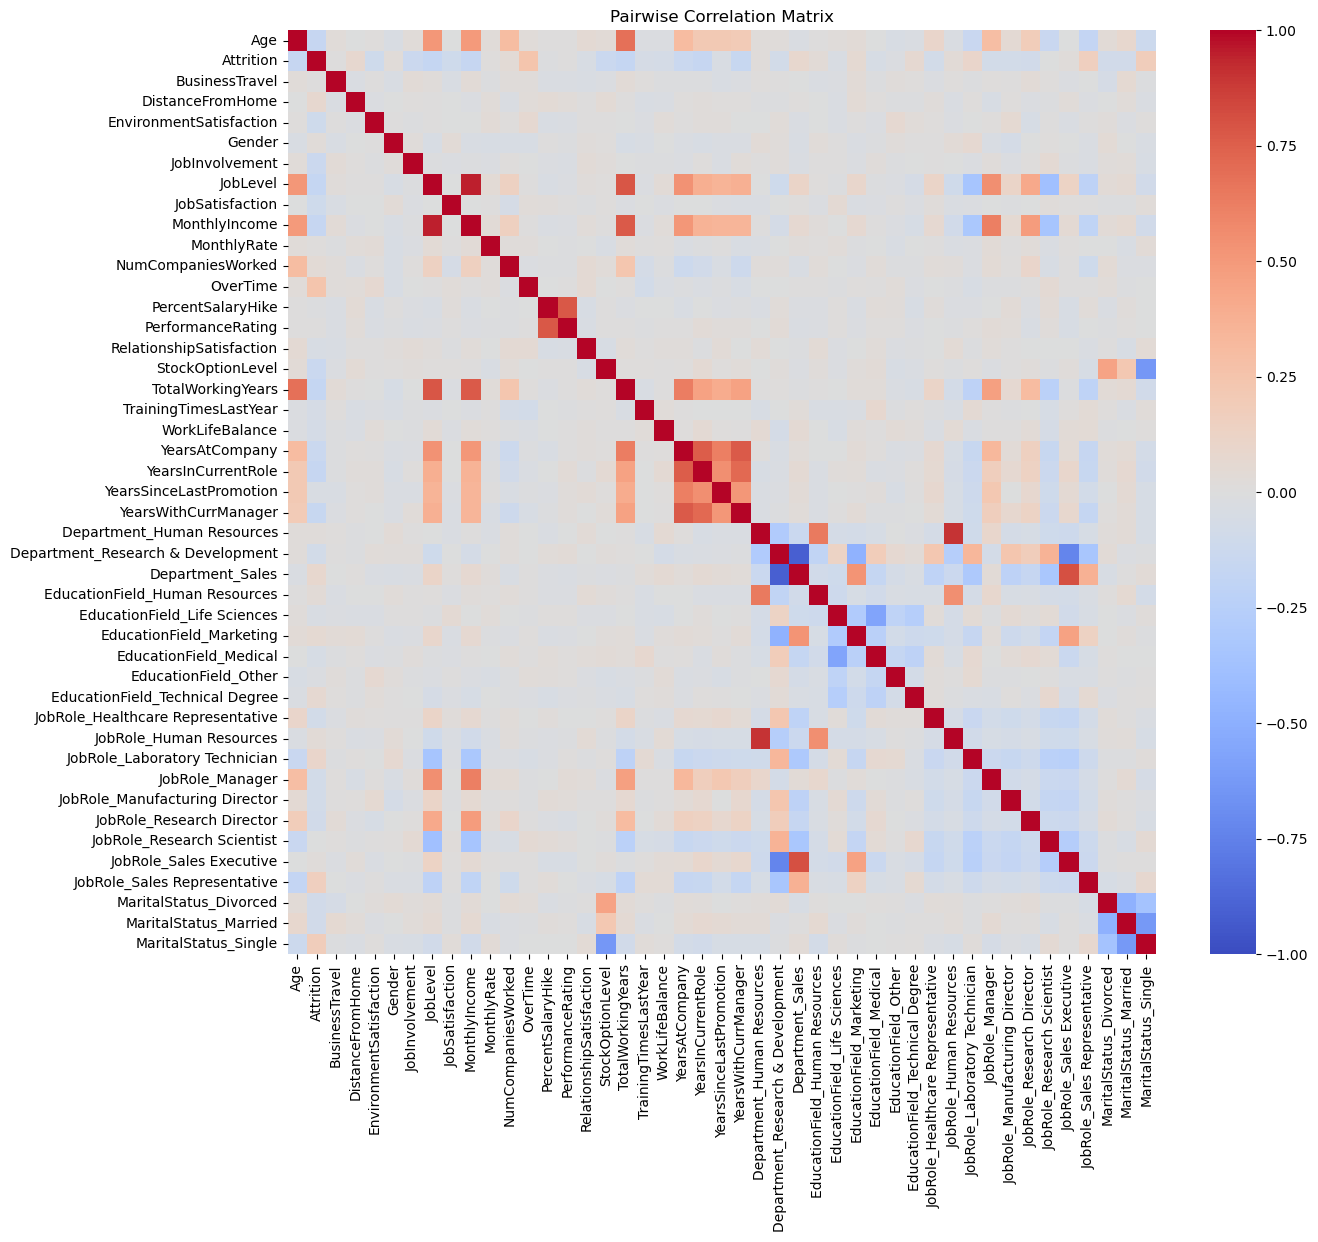

In [103]:
# Compute the pairwise correlation matrix
correlation_matrix = encoded_df.corr(numeric_only = True)

# Visualize it
plt.figure(figsize = (14, 12))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Pairwise Correlation Matrix')
plt.show()

In [104]:
# check which variables are highly correlated and which are weakly correlated with the target

# checking for multicollinearity (corr ~ +1 or -1 -- we can make the threshold |0.8|)
high_correlated_set = set()
corr_threshold = 0.8        # I've seen it in another paper that they used a threshold of 0.8 to identify highly correlated features

abs_correlation_mat = correlation_matrix.abs()
for row in range(len(abs_correlation_mat.columns)):
    for col in range(row):
        if abs_correlation_mat.iloc[row, col] > corr_threshold:
            high_correlated_set.add(abs_correlation_mat.columns[row])

high_correlated_set

{'Department_Sales',
 'JobRole_Human Resources',
 'JobRole_Sales Executive',
 'MonthlyIncome'}

In [105]:
# now checking for weakly-correlated features with the target 
attrition_corr = correlation_matrix['Attrition'].abs()
weakly_correlated_features = attrition_corr[attrition_corr < 0.01].index.tolist()

weakly_correlated_features

['BusinessTravel', 'PerformanceRating', 'JobRole_Research Scientist']

Looking at the features identified above, we can consider removing the following
*   Monthly Income --> we already have monthly rate
*   I personally would want to see if the department or job role one is in impacts attrition
*   Performance Rating sounds like a signficant factor --> maybe if you're not performing well, you would want to leave and explore better options?
*   Not sure if I should keep or drop Business Travel --> we could remove it and see

In [106]:
df_travel = encoded_df.drop(columns = ['MonthlyIncome'])
new_df = df_travel.drop(columns = ['BusinessTravel'])
new_df

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,0,3,2,4,19479,8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,8,3,1,2,2,2,24907,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,2,4,1,2,1,3,2396,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,3,4,0,3,1,3,23159,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,2,1,1,3,1,2,16632,9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,3,1,4,2,4,12290,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,6,4,1,2,3,1,21457,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,4,2,1,4,2,2,5174,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,2,4,1,2,2,2,13243,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [107]:
# computing Variance Inflation Factor (VIF) for each predictor to verify that we got rid of the multicollinear predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
temp_X = new_df.drop(columns = ['Attrition'])
vif_data['Feature'] = temp_X.columns
vif_data['VIF'] = [variance_inflation_factor(temp_X.values, i) for i in range(len(temp_X.columns))]
vif_data                # VIF < 5 --> low multicollinearity
                        # VIF ~ 1 --> no multicollinearity
                        # VIF > 10 --> severe multcollinearity, requires corrective measures
                        # VIF = inf --> perfect collinearity (one variable is a perfect linear combination of others, as in one category can be predicted from the other two)

c:\Users\user\anaconda3\envs\deep_learning1\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Age,2.041254
1,DistanceFromHome,1.019592
2,EnvironmentSatisfaction,1.026035
3,Gender,1.028008
4,JobInvolvement,1.021976
5,JobLevel,6.525879
6,JobSatisfaction,1.017066
7,MonthlyRate,1.018037
8,NumCompaniesWorked,1.274480
9,OverTime,1.031405


* As we can see all predictors (which were not one-hot encoded) have a VIF < 5 --> low multicollinearity 
* JobLevel has a VIF > 5, so we can consider removing
* All one-hot encoded predictors have a VIF of inf :)

In [108]:
newer_df = new_df.drop(columns = ['JobLevel'])

In [109]:
newer_X = newer_df.drop(columns = ['Attrition'])
newer_y = newer_df['Attrition']

<font size = 4, color = "green"><b> Experimenting with Machine Learning Models </b></font>

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_classif
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

In [111]:
# Feature Scaling (Z-Score Normalization)
zscore_norm = StandardScaler()
X_rescaled = zscore_norm.fit_transform(newer_X)
X_rescaled

array([[ 0.4463504 , -1.01090934, -0.66053067, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [ 1.32236521, -0.14714972,  0.25462493, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.008343  , -0.88751511,  1.16978053, ..., -0.53487311,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -0.64072665, -0.66053067, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 1.32236521, -0.88751511,  1.16978053, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.32016256, -0.14714972, -0.66053067, ..., -0.53487311,
         1.08823234, -0.68556546]])

In [112]:
# split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, newer_y, test_size = 0.20, random_state = 23)

<font size = 4, color = "gray"><b> 1) Logistic Regression </b></font>

<font size = 4, color = "gray"> <em>
<li>Used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1 (note that if there's more than 2 categories, softmax function is used)</li>
<li>If we have two classes (Class 0 and Class 1) --> if the value of the logistic function for an input is greater than some threshold value (e.g. 0.5) then it belongs to Class 1 otherwise it belongs to Class 0 </li>
<li>Extension of linear regression but mainly used for classification tasks (dependent variable must be categorical or discrete) </li>
<li>Instead of fitting a regression line, we fit an “S” shaped logistic function, which predicts two maximum values (0 or 1)</li>
</em></font>

<font color = "gray">
<b>Assumptions: </b>
<li><u>Independent Observations:</u> Each observation is independent of the other. meaning there is no correlation between any input variables.</li>
<li><u>Binary dependent variables:</u> It takes the assumption that the dependent variable must be binary or dichotomous, meaning it can take only two values. For more than two categories SoftMax functions are used</li>
<li><u>Linearity relationship between independent variables and log odds:</u> The relationship between the independent variables and the log odds of the dependent variable should be linear</li>
<li><u>No outliers:</u> There should be no outliers in the dataset</li>
<li><u>Large sample size:</u> The sample size is sufficiently large</li>
</font>

In [113]:
logRegModel = LogisticRegression(class_weight = 'balanced', random_state = 23)   # class_weight useful for imbalanced classes (like in our case)

logRegModel.fit(X_train, y_train)
prediction = logRegModel.predict(X_test)

logReg_accuracy = accuracy_score(y_test, prediction)
logReg_f1score = f1_score(y_test, prediction)
logReg_precision = precision_score(y_test, prediction)
logReg_recall = recall_score(y_test, prediction)

logReg_confMatrix = confusion_matrix(y_test, prediction)

print("Overall Logistic Regression Model Performance:\n")
print(f'- Accuracy: {logReg_accuracy * 100:.2f} %')
print(f'- Precision: {logReg_precision * 100:.2f} %')
print(f'- Recall: {logReg_recall * 100:.2f} %')
print(f'- F1-score: {logReg_f1score * 100:.2f} %\n')

print(f'- Confusion Matrix: \n{logReg_confMatrix}')

# plt.figure(figsize=(8, 6))
# sns.heatmap(logReg_confMatrix, annot = True, fmt = 'd', cmap='Blues', cbar = True,
#             xticklabels = ['Predicted 0', 'Predicted 1'],
#             yticklabels = ['Actual 0', 'Actual 1'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Logistic Regression Model Confusion Matrix')
# plt.show()

Overall Logistic Regression Model Performance:

- Accuracy: 72.79 %
- Precision: 34.62 %
- Recall: 75.00 %
- F1-score: 47.37 %

- Confusion Matrix: 
[[178  68]
 [ 12  36]]


As noticed, the model yields low precision & F1-scores and somewhat decent accuracy and recall. We need to improve the model performance
*   Precision --> high false-positives (employees were falsely identified as leaving when they are still with the organization)
*   F1-score --> most likely due to the imbalanced dataset, model was probably biased towards the majority class (class 0)
*   Recall --> model correctly identifies most employees who actually left

What can we do?
*   Experiment parameter fine tuning with GridSearchCV (regularization strength (C), solver, )
*   Handing class imbalance by oversampling (SMOTE) or undersampling since using a 'balanced' class weight is not enough
*   Feature Selection

<font color = "gray"><b>Handling Class Imbalance</b></font>


<font color = "gray"><u>Oversampling (SMOTE)</u></font>

In [114]:
# Before Handling Class Imbalance
newer_y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [124]:
newer_y.isnull().sum().sum()

0

In [134]:
smote_EEN = SMOTEENN(random_state = 23, sampling_strategy = 'all')
X_resampled, y_resampled = smote_EEN.fit_resample(X_rescaled, newer_y)

AttributeError: 'NoneType' object has no attribute 'split'

<font color = "gray"><b>Parameter Fine Tuning</b></font>

In [ ]:
param_grid = {
    'penalty': ['l1','l2','elasticnet','none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter': [100, 1000, 2500, 5000]
}

gridSearch_log = GridSearchCV(estimator = logRegModel, param_grid = param_grid, cv = 5, scoring = 'f1')
gridSearch_log.fit(X_train, y_train)

In [ ]:
print('Best Estimator: ', gridSearch_log.best_estimator_)
print(f'- Best Score: {gridSearch_log.best_score_ * 100:.2f} %')